In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/loan.csv

--2022-04-01 09:01:36--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/loan.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.149.82
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.149.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38013 (37K) [text/csv]
Saving to: ‘loan.csv’

loan.csv            100%[===================>]  37.12K   151KB/s    in 0.2s    

2022-04-01 09:01:38 (151 KB/s) - ‘loan.csv’ saved [38013/38013]



In [ ]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv('loan.csv') 
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# getting the statistical measures of the data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


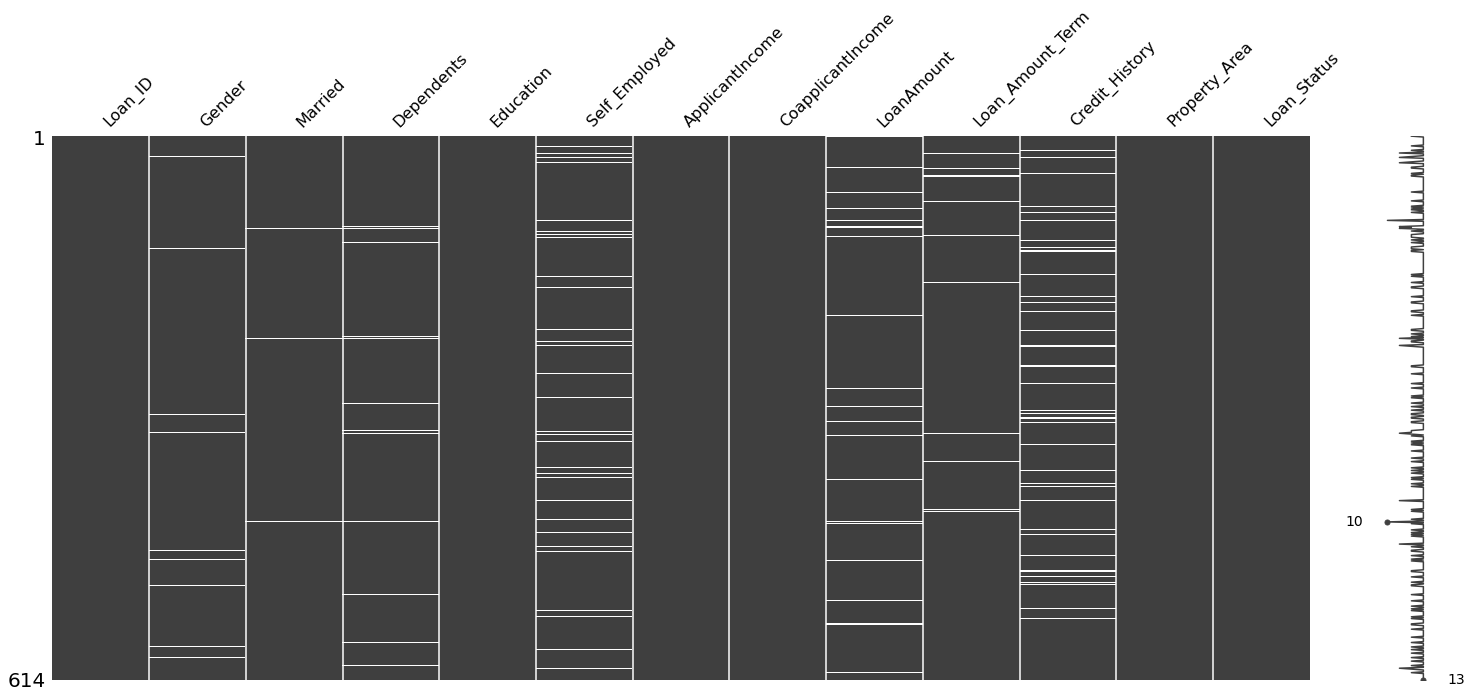

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
# number of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.isnull().sum().sum()

149

In [ ]:
# dropping the missing values
df = df.dropna()

In [ ]:
# number of missing values in each column
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# label encoding
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [ ]:
df['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

0 --> No

1 --> Y

In [ ]:
df.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
0,5730.189189,1773.081081,153.378378,342.810811,0.574324
1,5201.093373,1495.508795,140.882530,341.710843,0.978916


## EDA

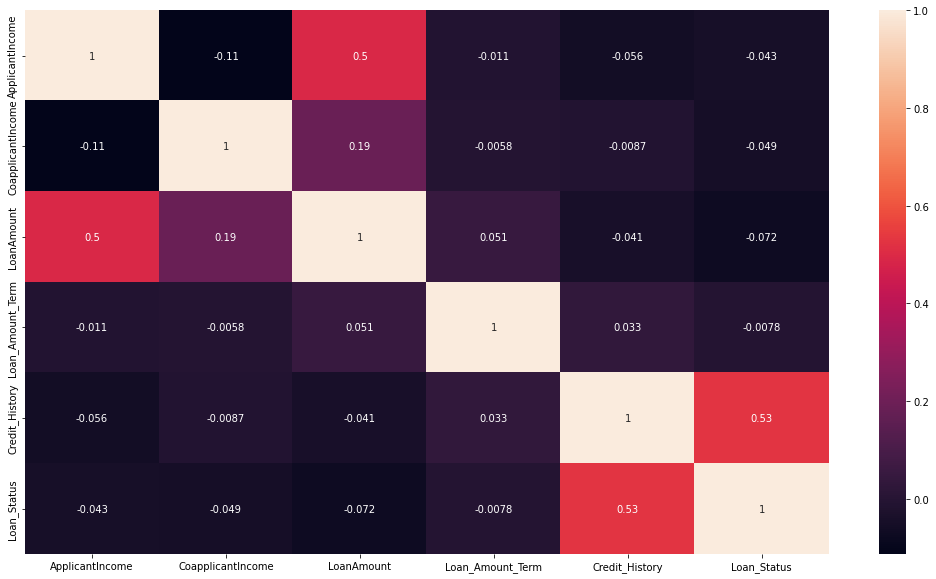

In [ ]:
import seaborn as sns

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

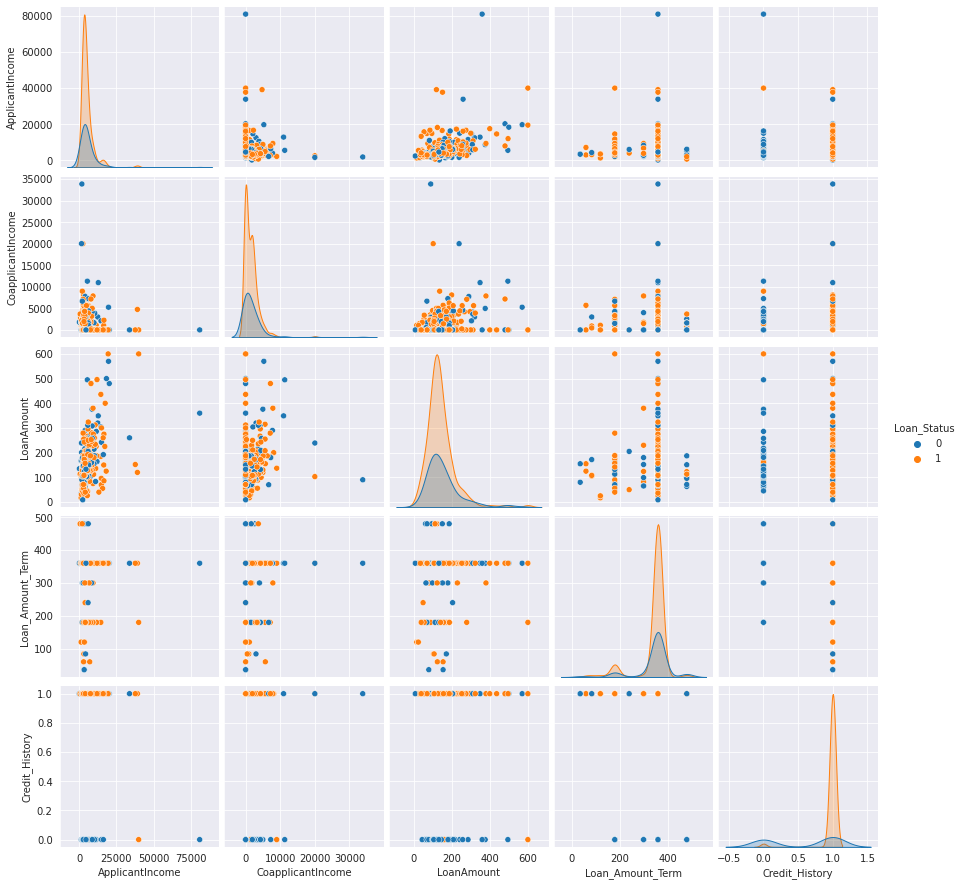

In [ ]:
sns.pairplot(df,hue='Loan_Status');

In [ ]:
# Dependent column values
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
# replacing the value of 3+ to 4
df = df.replace(to_replace='3+', value=4)

In [ ]:
# dependent values
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

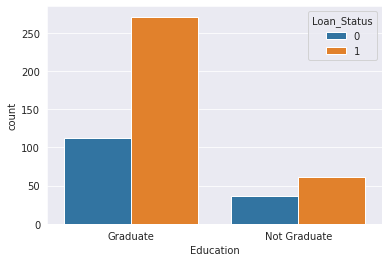

In [ ]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=df)

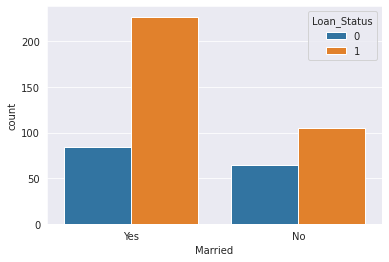

In [ ]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=df)

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [ ]:
# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},
            'Gender':{'Male':1,'Female':0},
            'Self_Employed':{'No':0,'Yes':1},
            'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
            'Education':{'Graduate':1,'Not Graduate':0}
            },inplace=True)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [ ]:
# separating the data and label
X_ = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = df['Loan_Status']

In [ ]:
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)
X = standardized_data

Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


>1, train: 0.773, test: 0.698
>2, train: 0.828, test: 0.729
>3, train: 0.828, test: 0.729
>4, train: 0.844, test: 0.729
>5, train: 0.862, test: 0.729
>6, train: 0.870, test: 0.719
>7, train: 0.885, test: 0.719
>8, train: 0.914, test: 0.719
>9, train: 0.930, test: 0.729
>10, train: 0.958, test: 0.740
>11, train: 0.977, test: 0.729
>12, train: 0.990, test: 0.729
>13, train: 0.995, test: 0.719
>14, train: 0.997, test: 0.729
>15, train: 0.997, test: 0.719
>16, train: 1.000, test: 0.708
>17, train: 1.000, test: 0.719
>18, train: 1.000, test: 0.719
>19, train: 1.000, test: 0.719
>20, train: 1.000, test: 0.719


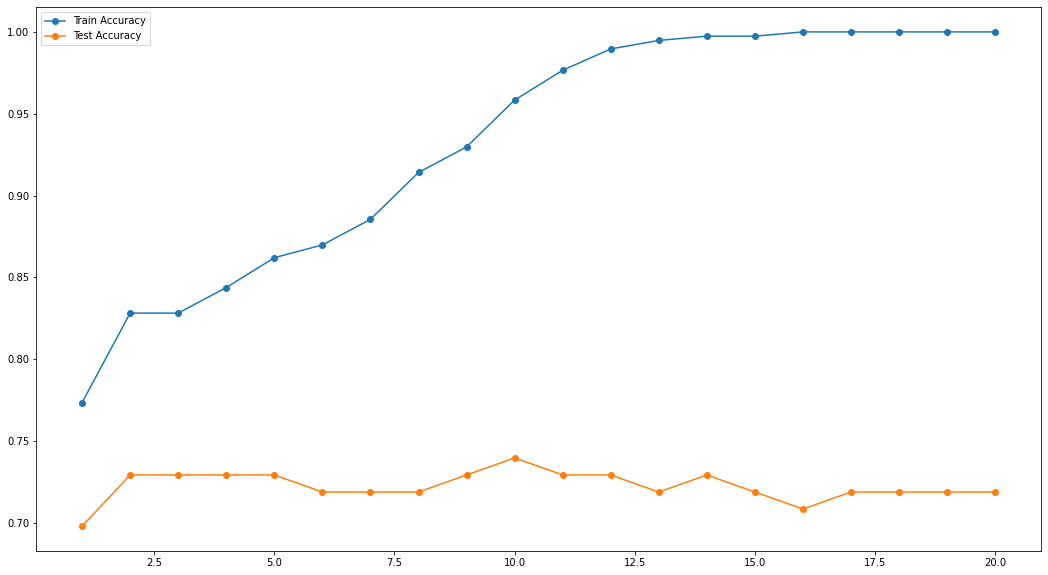

In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_scores, test_scores = [],[]
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_y_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_y_pred)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_y_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_y_pred)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

plt.figure(figsize=(18,10))
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.legend()

In [ ]:
## one of the best fit is with depth=10 --> train: 0.958, test: 0.740

Training the Model

In [ ]:
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=10)

In [ ]:
#training the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=667)

Text(0.5, 0, 'Relative Importance')

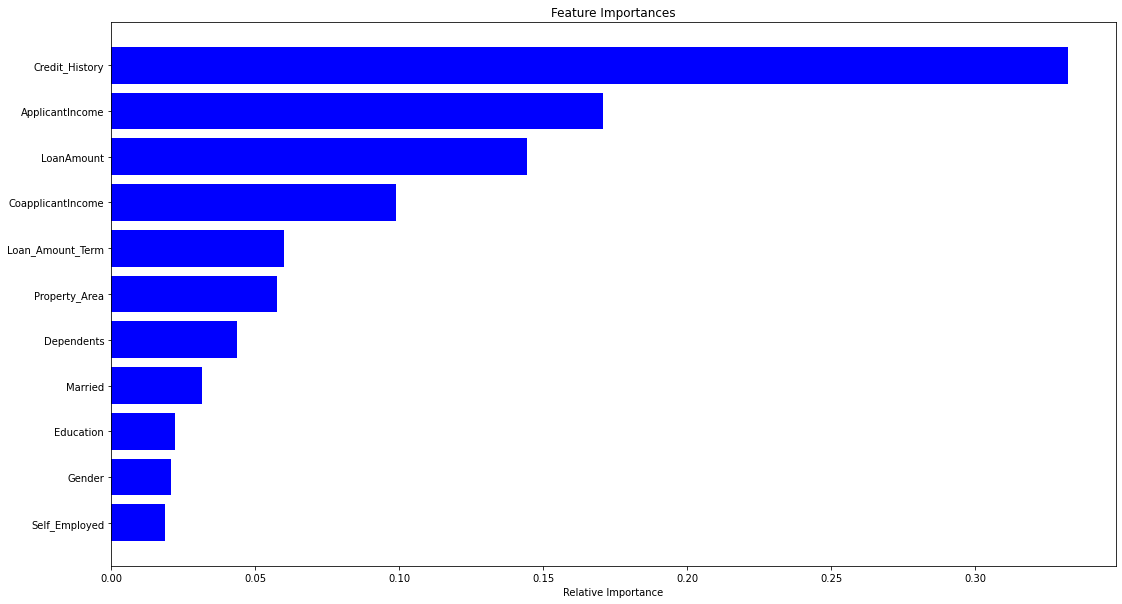

In [ ]:
#Feature importance for Random Forest
features = X_.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(18,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

Model Evaluation

In [ ]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7395833333333334


In [ ]:
labels = ['No Loan', 'Yes Loan']

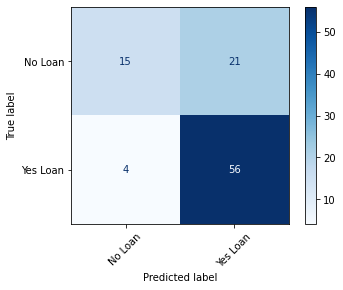

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

#labels = ['class1', 'class2']
cm = ConfusionMatrixDisplay.from_estimator(classifier, 
                                      X_test, 
                                      y_test,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

In [ ]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     No Loan       0.79      0.42      0.55        36
    Yes Loan       0.73      0.93      0.82        60

    accuracy                           0.74        96
   macro avg       0.76      0.68      0.68        96
weighted avg       0.75      0.74      0.72        96



## ROC Curves

In [ ]:
!pip install plot-metric --quiet

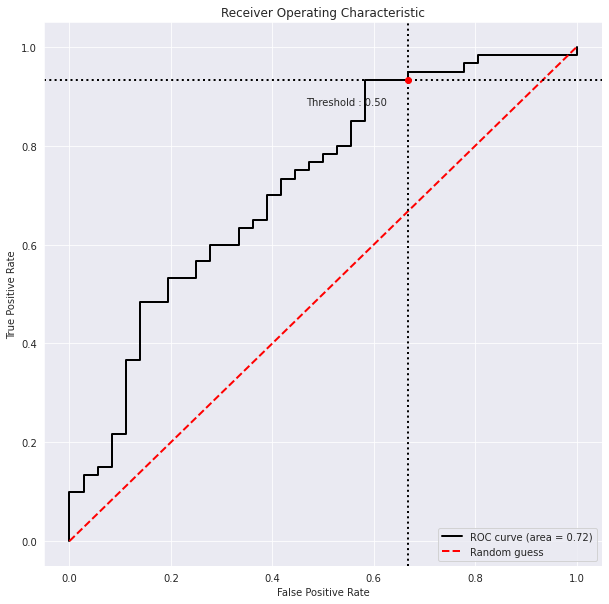

In [ ]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

0.7189814814814814

## P-R Curves

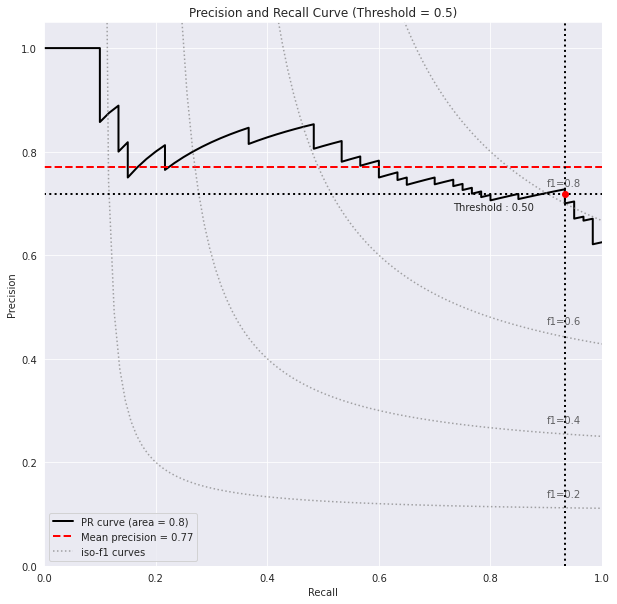

In [ ]:
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

### Making a Predictive System + Normalization

In [ ]:
input_data = [1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0]

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction[0])

if (prediction[0] == 0):
  print('No access to Loan')
else:
  print('Yes access to Loan')

[[ 0.46719815  0.73716237  0.11235219  0.50325312 -0.3992747  -0.13796959
  -0.02795204 -0.20808917  0.27554157  0.41319694 -1.31886834]]
1
Yes access to Loan


## Feature selection
Check the Pipeline performance with feature 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

featu=[]
for i in range(2,len(X_.columns)):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=10)
    pipe = Pipeline([
                    ('scaler', StandardScaler()),
                    ('featureselection',rfe),
                    ('classifier',classifier)
                    ])
    pipe.fit(X_train,y_train)
    test_y_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    y_pred_proba = pipe.predict_proba(X_test)[::,1]
    roc_auc = roc_auc_score(y_test,y_pred_proba)
    featu.append(roc_auc)
    # summarize progress
    print('feature selected %d, Acc.Test: %.3f, AUC: %.3f' % (i, test_acc, roc_auc ))

print('\n Best number of feature selection is: %d' % (np.argmax(featu) +2))


feature selected 2, Acc.Test: 0.708, AUC: 0.624
feature selected 3, Acc.Test: 0.708, AUC: 0.730
feature selected 4, Acc.Test: 0.729, AUC: 0.745
feature selected 5, Acc.Test: 0.750, AUC: 0.764
feature selected 6, Acc.Test: 0.729, AUC: 0.732
feature selected 7, Acc.Test: 0.719, AUC: 0.725
feature selected 8, Acc.Test: 0.708, AUC: 0.735
feature selected 9, Acc.Test: 0.719, AUC: 0.753
feature selected 10, Acc.Test: 0.729, AUC: 0.734

 Best number of feature selection is: 5


In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=10)

pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('featureselection',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=5)),
                ('classifier',
                 RandomForestClassifier(max_depth=10, random_state=667))])

In [ ]:
input_data = [1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0]

prediction = pipe.predict([input_data])
print(prediction[0])

if (prediction[0] == 0):
  print('No access to Loan')
else:
  print('Yes access to Loan')

0
No access to Loan


In [ ]:
import joblib
joblib.dump(pipe,'pipe_loan.pkl')

['pipe_loan.pkl']

In [ ]:
uploaded_model = joblib.load('pipe_loan.pkl')

uploaded_model.predict([input_data])[0] #0 means No Loan

0